In [1]:
import pandas as pd 
import numpy as np


In [75]:
books = pd.read_csv("books.csv")
ratings= pd.read_csv("ratings.csv")
book_tags=pd.read_csv("book_tags.csv")
tags = pd.read_csv("tags.csv")
to_read = pd.read_csv("to_read.csv")

In [3]:
books.head()
#books has metadata for each book (goodreads IDs, authors, title, average rating, etc.).

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
books.shape

(10000, 23)

In [5]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [6]:
# contains around 6 million ratings
ratings.shape


(5976479, 3)

In [7]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [8]:
book_tags.shape
#contains genres assigned to books by users.

(999912, 3)

In [9]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [10]:
tags.shape
# tags df translates tag IDs to names.

(34252, 2)

In [11]:
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [12]:
to_read.shape
#provides IDs of the books marked “to read” by each user, as user_id,book_id pairs, sorted by time. 
#There are close to a million pairs.

(912705, 2)

In [13]:
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [3]:
tags_join_DF = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join_DF.tail()

,goodreads_book_id,tag_id,count,tag_name
999907,31538635,14690,6,hogwarts
999908,32848471,16149,21,jan-2017
999909,33288638,27821,9,single-mom
999910,33288638,11478,7,fave-author
999911,33288638,27939,7,slowburn


In [4]:
tags_join_DF[tags_join_DF['tag_id']==30574]

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read
5,8,30574,2823,to-read
6,10,30574,3226,to-read
7,11,30574,32303,to-read
8,13,30574,75870,to-read
9,21,30574,33603,to-read


In [5]:
tags_join_DF= tags_join_DF[tags_join_DF.tag_name!="to-read"]

In [6]:
tags_join_DF= tags_join_DF[tags_join_DF['count'] > 1]

In [7]:
tags_join_DF.head()

,goodreads_book_id,tag_id,count,tag_name
9983,1,11305,37174,fantasy
9984,2,11305,3441,fantasy
9985,3,11305,47478,fantasy
9986,5,11305,39330,fantasy
9987,6,11305,38378,fantasy


In [8]:
merge_DF = pd.merge(tags_join_DF, books, left_on='goodreads_book_id', right_on='goodreads_book_id', how='left')


In [47]:
merge_DF.head()

,goodreads_book_id,tag_id,count,tag_name,book_id,best_book_id,work_id,books_count,isbn,isbn13,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,11305,37174,fantasy,27,1,41335427,275,439785960,9.780440e+12,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,2,11305,3441,fantasy,21,2,2809203,307,439358078,9.780439e+12,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
2,3,11305,47478,fantasy,2,3,4640799,491,439554934,9.780440e+12,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,5,11305,39330,fantasy,18,5,2402163,376,043965548X,9.780440e+12,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
4,6,11305,38378,fantasy,24,6,3046572,332,439139600,9.780439e+12,...,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...


In [19]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [9]:
books['tag_list'] = None

In [10]:
for index, row in books.iterrows():
    book_tags = tags_join_DF[tags_join_DF['goodreads_book_id'] == row['goodreads_book_id']]
    books.at[index, 'tag_list'] = book_tags['tag_name'].tolist()
    #print(row['tag_list'])

In [22]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_list
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"[fantasy, favorites, currently-reading, young-..."
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"[fantasy, favorites, currently-reading, young-..."
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"[fantasy, favorites, currently-reading, young-..."
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"[favorites, currently-reading, young-adult, fi..."
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"[favorites, currently-reading, young-adult, fi..."


In [11]:
pd.options.display.max_columns=50

In [12]:
books=books.drop(['goodreads_book_id', 'best_book_id', 'work_id','isbn', 'isbn13','image_url', 'small_image_url'],axis=1)

In [25]:
books.head()

,book_id,books_count,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tag_list
0,1,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"[fantasy, favorites, currently-reading, young-..."
1,2,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"[fantasy, favorites, currently-reading, young-..."
2,3,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,"[fantasy, favorites, currently-reading, young-..."
3,4,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,"[favorites, currently-reading, young-adult, fi..."
4,5,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,"[favorites, currently-reading, young-adult, fi..."


In [13]:
authors=pd.get_dummies(books['authors'])

In [27]:
authors.head()

,A. Manette Ansay,A. Meredith Walters,"A.A. Milne, Ernest H. Shepard",A.C. Gaughen,A.G. Howard,A.G. Riddle,A.J. Banner,A.J. Jacobs,"A.L. Singer, Walt Disney Company",A.M. Homes,"A.N. Roquelaure, Anne Rice","A.P.J. Abdul Kalam, Arun Tiwari",A.S. Byatt,A.S. King,A.S.A. Harrison,A.W. Tozer,Abbi Glines,"Abigail Haas, Abby McDonald",Abraham Verghese,Adam Gidwitz,Adam Gopnik,Adam Hochschild,Adam Johnson,Adam M. Grant,"Adam Makos, Larry Alexander",...,خالد الباتلي,"خالد الخميسي, Khaled Al Khamissi",خولة حمدي,"سعود السنعوسي, Saud Alsanousi",سلطان موسى الموسى,سهراب سپهری,"صلاح جاهين, يحيى حقي",عائض القرني,عباس معروفی,عبدالله المغلوث,عزالدين شكري فشير,عمر طاهر,عمرو سلامة,غسان كنفاني,محمد السالم,"محمد المنسي قنديل, Mohamed Mansi Qandil",محمد صادق,محمد عبد الرحمن العريفي,مصطفى إبراهيم,مصطفى محمود,منى المرشود,نور عبدالمجيد,ياسر حارب,يوسف زيدان,"يوسف زيدان, Youssef Ziedan"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
language_code=pd.get_dummies(books['language_code'])

In [29]:
language_code.head()

,ara,dan,en,en-CA,en-GB,en-US,eng,fil,fre,ger,ind,ita,jpn,mul,nl,nor,per,pol,por,rum,rus,spa,swe,tur,vie
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
one_hot_merged=pd.merge(language_code,authors,left_index= True, right_index=True, how='left')

In [31]:
one_hot_merged.head()

,ara,dan,en,en-CA,en-GB,en-US,eng,fil,fre,ger,ind,ita,jpn,mul,nl,nor,per,pol,por,rum,rus,spa,swe,tur,vie,...,خالد الباتلي,"خالد الخميسي, Khaled Al Khamissi",خولة حمدي,"سعود السنعوسي, Saud Alsanousi",سلطان موسى الموسى,سهراب سپهری,"صلاح جاهين, يحيى حقي",عائض القرني,عباس معروفی,عبدالله المغلوث,عزالدين شكري فشير,عمر طاهر,عمرو سلامة,غسان كنفاني,محمد السالم,"محمد المنسي قنديل, Mohamed Mansi Qandil",محمد صادق,محمد عبد الرحمن العريفي,مصطفى إبراهيم,مصطفى محمود,منى المرشود,نور عبدالمجيد,ياسر حارب,يوسف زيدان,"يوسف زيدان, Youssef Ziedan"
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
books_merged=pd.merge(books,one_hot_merged,left_index= True, right_index=True, how='left')

In [33]:
books_merged.head()

,book_id,books_count,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tag_list,ara,dan,en,en-CA,en-GB,en-US,eng,fil,...,خالد الباتلي,"خالد الخميسي, Khaled Al Khamissi",خولة حمدي,"سعود السنعوسي, Saud Alsanousi",سلطان موسى الموسى,سهراب سپهری,"صلاح جاهين, يحيى حقي",عائض القرني,عباس معروفی,عبدالله المغلوث,عزالدين شكري فشير,عمر طاهر,عمرو سلامة,غسان كنفاني,محمد السالم,"محمد المنسي قنديل, Mohamed Mansi Qandil",محمد صادق,محمد عبد الرحمن العريفي,مصطفى إبراهيم,مصطفى محمود,منى المرشود,نور عبدالمجيد,ياسر حارب,يوسف زيدان,"يوسف زيدان, Youssef Ziedan"
0,1,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,"[favorites, currently-reading, young-adult, fi...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,"[favorites, currently-reading, young-adult, fi...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
books_merged=books_merged.drop(['authors','language_code'],axis=1)

In [35]:
books_merged.head()

,book_id,books_count,original_publication_year,original_title,title,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tag_list,ara,dan,en,en-CA,en-GB,en-US,eng,fil,fre,ger,...,خالد الباتلي,"خالد الخميسي, Khaled Al Khamissi",خولة حمدي,"سعود السنعوسي, Saud Alsanousi",سلطان موسى الموسى,سهراب سپهری,"صلاح جاهين, يحيى حقي",عائض القرني,عباس معروفی,عبدالله المغلوث,عزالدين شكري فشير,عمر طاهر,عمرو سلامة,غسان كنفاني,محمد السالم,"محمد المنسي قنديل, Mohamed Mansi Qandil",محمد صادق,محمد عبد الرحمن العريفي,مصطفى إبراهيم,مصطفى محمود,منى المرشود,نور عبدالمجيد,ياسر حارب,يوسف زيدان,"يوسف زيدان, Youssef Ziedan"
0,1,272,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,491,1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,226,2005.0,Twilight,"Twilight (Twilight, #1)",3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,487,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,"[favorites, currently-reading, young-adult, fi...",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1356,1925.0,The Great Gatsby,The Great Gatsby,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,"[favorites, currently-reading, young-adult, fi...",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/emily-
[nltk_data]     air13/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def clean_titles(text):
    text = str(text)
    tokens = text.split()
    
    
    stop_words = set(stopwords.words('english'))
    tokens = [w.lower() for w in tokens if not w in stop_words]
    tokens = [w for w in tokens if len(w)>1]
    return ' '.join(tokens)

books_merged['title'] = books_merged.apply(lambda x: clean_titles(x['title']), axis=1)

In [20]:
books_merged['original_title'] = books_merged.apply(lambda x: clean_titles(x['original_title']), axis=1)

In [21]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [22]:
books_merged['combined_title'] = books_merged.apply(lambda x: x['title'] + ' ' + x['original_title'], axis=1)

In [23]:
title_tokenizer = Tokenizer(num_words=1000)
title_tokenizer.fit_on_texts(np.asarray(books_merged['combined_title']))

In [24]:
title_tokens = title_tokenizer.texts_to_matrix(np.asarray(books_merged['combined_title']), mode='tfidf')

In [25]:
books_merged=pd.merge(books_merged, pd.DataFrame(title_tokens), left_index=True, right_index=True, how='left')

In [26]:
books_merged.drop(['title', 'original_title'], axis=1, inplace=True)

In [27]:
books_merged.head()

,book_id,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tag_list,ara,dan,en,en-CA,en-GB,en-US,eng,fil,fre,ger,ind,ita,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1,272,2008.0,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,491,1997.0,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,226,2005.0,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,"[fantasy, favorites, currently-reading, young-...",0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,487,1960.0,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,"[favorites, currently-reading, young-adult, fi...",0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1356,1925.0,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,"[favorites, currently-reading, young-adult, fi...",0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
tag_tokenizer = Tokenizer(num_words=1000, lower=True)

In [28]:
# Reference: https://stackoverflow.com/questions/23996118/replace-special-characters-in-a-string-python
import re 

def clean_tags(tags):
    clean = []
    for i in tags:
        clean.append((re.sub('[^a-zA-Z0-9 \n\.]', ' ', i)).lower())
    
    stop_words = set(stopwords.words('english'))
    clean = [w.lower() for w in clean if not w in stop_words]
    clean = [w for w in clean if len(w)>1]
    return ' '.join(clean)
    

books_merged['tag_list'] = books_merged.apply(lambda x: clean_tags(x['tag_list']), axis=1)        

In [29]:
tag_tokenizer.fit_on_texts(np.asarray(books_merged['tag_list']))
tag_tokens = tag_tokenizer.texts_to_matrix(np.asarray(books_merged['combined_title']), mode='tfidf')

In [30]:
books_merged = pd.merge(books_merged, pd.DataFrame(tag_tokens), left_index=True, right_index=True, how='left')

In [31]:
books_merged.drop('tag_list', axis=1, inplace=True)

In [32]:
books_merged.shape

(10000, 6702)

In [33]:
books_merged.drop('combined_title', axis=1, inplace=True)

In [34]:
books_merged.fillna(0, inplace=True)

## Scale Book Features to Keep

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
keep_columns = ['book_id', 'books_count', 'original_publication_year', 'average_rating', 'ratings_count', 
                'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 
                'ratings_4', 'ratings_5']

In [37]:
books_final_features = books_merged[keep_columns]
books_reduce = books_merged.drop(keep_columns, axis=1)

In [38]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(books_final_features.drop('book_id', axis=1))

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/emily-air13/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
scaled_features

array([[ 1.15150042e+00,  1.70120804e-01,  1.32778854e+00, ...,
         1.92193269e+01,  2.84059750e+01,  3.36304226e+01],
       [ 2.43624270e+00,  1.08103907e-01,  1.72084749e+00, ...,
         1.55385450e+01,  2.20887750e+01,  3.74569930e+01],
       [ 8.81645881e-01,  1.53207105e-01, -1.69876544e+00, ...,
         2.73898234e+01,  1.66218459e+01,  1.66946770e+01],
       ...,
       [-9.21770319e-02, -4.65408619e-03,  1.36709443e+00, ...,
        -3.60304289e-01, -3.05681058e-01, -2.33308213e-01],
       [-4.03096396e-01,  1.87034503e-01, -1.38431827e+00, ...,
        -2.70130948e-01, -2.99130346e-01, -2.68474058e-01],
       [-2.62302722e-01,  1.13741807e-01, -8.61192177e-03, ...,
        -3.30877092e-01, -3.07663766e-01, -2.59773489e-01]])

In [40]:
scaled_features.shape

(10000, 11)

In [41]:
scaled_features = pd.DataFrame(scaled_features, columns=['books_count', 'original_publication_year', 'average_rating', 'ratings_count', 
                'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 
                'ratings_4', 'ratings_5'])

In [42]:
scaled_book_data = pd.merge(pd.DataFrame(books_final_features['book_id']), scaled_features, left_index=True, right_index=True, how='left')
scaled_book_data.head()

,book_id,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,1.151500,0.170121,1.327789,30.036789,29.098997,24.874634,9.851855,12.846534,19.219327,28.405975,33.630423
1,2,2.436243,0.108104,1.720847,28.904534,28.250940,11.911526,11.176438,10.143953,15.538545,22.088775,37.456993
2,3,0.881646,0.153207,-1.698765,24.229710,22.987143,15.037225,68.549476,44.633867,27.389823,16.621846,16.694677
3,4,2.412777,-0.100498,0.974035,19.983656,19.554820,11.375772,8.904196,11.763752,15.251665,19.088160,21.193247
4,5,7.510681,-0.297825,-0.440977,16.710904,16.174804,8.012977,12.793850,20.018253,20.833128,17.806397,11.583143


In [43]:
scaled_book_data.to_csv('scaled_book_data.csv', index=False)
books_reduce.to_csv('raw_tokenized_features.csv', index=False)

## PCA for topic modeling and feature reduction

In [44]:
pca = PCA(n_components = books_reduce.shape[1])
pca.fit(books_reduce)


PCA(copy=True, iterated_power='auto', n_components=6689, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

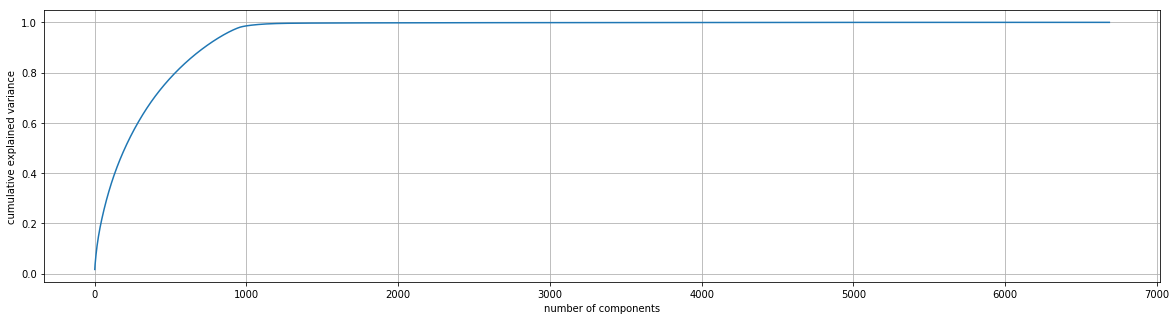

In [46]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [47]:
pca = PCA(n_components = 1000)

In [49]:
reduced_features = pca.fit_transform(books_reduce)

In [50]:
scaled_book_data_final = pd.merge(scaled_book_data, pd.DataFrame(reduced_features), left_index=True, right_index=True, how='left')
scaled_book_data_final.to_csv('final_scaled_book_features.csv')

In [51]:
scaled_book_data_final.head()

,book_id,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,0,1,2,3,4,5,6,7,8,9,10,11,12,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1,1.151500,0.170121,1.327789,30.036789,29.098997,24.874634,9.851855,12.846534,19.219327,28.405975,33.630423,3.861284,2.566748,0.210748,0.284279,0.025858,-0.060228,-0.338366,-0.046741,-0.209734,-0.229426,0.001803,-0.070782,-0.115306,...,0.045325,0.054625,0.013876,0.048103,0.008190,0.009736,0.036843,-0.017587,0.017419,-0.053032,0.109324,-0.059160,-0.030649,-0.192697,-0.206718,-0.197285,-0.142281,0.040959,0.054953,0.007222,-0.008292,-0.031171,0.013801,-0.007299,-0.002888
1,2,2.436243,0.108104,1.720847,28.904534,28.250940,11.911526,11.176438,10.143953,15.538545,22.088775,37.456993,3.731869,-1.374467,-0.740659,-0.931268,-0.579909,-1.799351,-2.304201,-0.221628,13.890481,1.497531,-0.388413,0.730261,-0.169282,...,0.003660,0.015605,0.031456,0.046761,-0.042441,-0.084364,0.020641,-0.043674,-0.064039,-0.001465,-0.014470,0.001246,-0.085047,0.140436,0.266039,-0.179232,0.094403,0.045204,-0.115262,-0.052617,0.039983,-0.001618,-0.045403,0.035432,0.031503
2,3,0.881646,0.153207,-1.698765,24.229710,22.987143,15.037225,68.549476,44.633867,27.389823,16.621846,16.694677,3.542018,-1.342553,-0.200370,-0.020612,-0.268023,0.033548,-0.090927,0.114726,-0.175120,-0.073968,0.047490,0.192555,-0.057339,...,-0.006162,0.055305,0.017301,-0.038499,-0.030971,-0.030034,0.024281,0.038600,0.010790,0.001328,0.014286,-0.011462,-0.008814,-0.016577,0.005100,-0.039717,0.008756,0.003771,-0.009742,-0.016105,0.029757,0.030575,-0.035767,0.012290,-0.040382
3,4,2.412777,-0.100498,0.974035,19.983656,19.554820,11.375772,8.904196,11.763752,15.251665,19.088160,21.193247,-0.858651,-1.192375,0.201947,-0.079532,-0.275008,-0.027510,-0.045410,-0.358395,-0.085781,-0.217773,0.064988,0.239511,-0.087887,...,-0.003643,-0.075607,-0.042429,-0.047257,-0.033120,-0.004904,0.002706,0.004592,-0.015453,-0.010446,-0.012925,-0.001977,0.042630,0.022915,0.018533,0.010314,0.011489,0.003999,-0.055686,-0.034853,0.069056,-0.005663,0.005043,0.034300,0.001282
4,5,7.510681,-0.297825,-0.440977,16.710904,16.174804,8.012977,12.793850,20.018253,20.833128,17.806397,11.583143,-0.547070,2.284080,0.549079,-0.242523,-0.009409,0.029059,-0.417086,0.111421,-0.288031,-0.289889,0.182413,0.687620,-0.129807,...,0.000956,-0.094349,-0.057931,0.018167,-0.052984,0.047148,0.031114,-0.032382,-0.001223,0.033635,-0.064335,0.054388,-0.013145,-0.021689,-0.036676,-0.042768,-0.010443,-0.022142,0.021337,0.017185,0.027261,0.011942,0.013499,-0.017616,0.012840


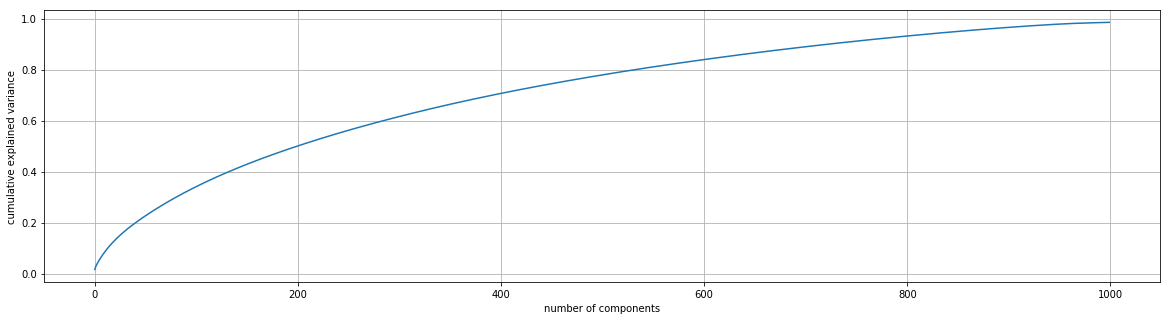

In [52]:
plt.figure(figsize=(20,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [53]:
pca = PCA(n_components = 500)
reduced_features_500 = pca.fit_transform(books_reduce)

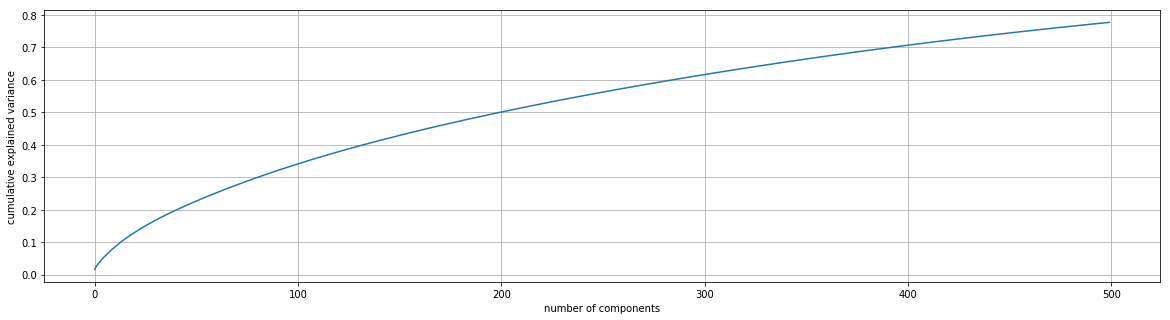

In [54]:
plt.figure(figsize=(20,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [55]:
scaled_book_data_final_500 = pd.merge(scaled_book_data, pd.DataFrame(reduced_features_500), left_index=True, right_index=True, how='left')
scaled_book_data_final_500.to_csv('final_scaled_book_features_500.csv')

## User Set Splits

In [60]:
ratings['user_id'].value_counts()

30944    200
12874    200
52036    199
28158    199
12381    199
45554    197
6630     197
14372    196
24143    196
37834    196
7563     196
19729    196
9668     196
15604    196
9806     196
9731     195
25840    195
10509    195
38798    195
33065    195
26718    194
32745    194
17566    194
53293    194
10288    194
3739     193
2487     193
8167     193
28767    193
43602    193
        ... 
49880     24
43848     24
12570     24
45407     24
43447     24
14108     24
31931     24
47143     23
39865     23
18327     23
13782     23
40212     23
32960     22
42736     22
16470     22
50918     22
43672     22
25856     22
25258     22
40299     22
22020     22
37640     22
38280     22
34099     22
48077     22
51725     21
32128     21
40753     21
43675     20
34590     19
Name: user_id, Length: 53424, dtype: int64

In [76]:
cold_start_users = [1, 2, 3, 4, 5]
cold_start_ratings = ratings[ratings['user_id'].isin(cold_start_users)]

In [77]:
ratings = ratings[~ratings['user_id'].isin(cold_start_users)]

In [78]:
ratings.shape

(5975972, 3)

In [79]:
from sklearn.model_selection import train_test_split
ratings_train, ratings_test = train_test_split(ratings, test_size=0.3, random_state=71)

In [80]:
ratings_train.shape

(4183180, 3)

In [81]:
ratings_test.shape

(1792792, 3)

In [82]:
ratings_train.to_csv('train_ratings_set.csv', index=False)
ratings_test.to_csv('test_ratings_set.csv', index=False)
cold_start_ratings.to_csv('cold_start_ratings_set.csv', index=False)